# Recolección y Exploración del Corpus de Noticias

## Introducción
El análisis de texto es una técnica fundamental en el procesamiento del lenguaje natural (NLP), utilizada para extraer información significativa de grandes volúmenes de datos textuales. En este caso, trabajaremos con un conjunto de noticias provenientes de un archivo de datos en Excel, con el objetivo de realizar una carga, exploración, filtrado y análisis del corpus de noticias. Además, se implementarán técnicas de preprocesamiento como limpieza del texto, tokenización y padding, permitiendo mejorar la calidad de los datos procesados para su uso en modelos de aprendizaje profundo.

### Este cuaderno Jupyter se enfocará en:

1. Carga y visualización del corpus 
* Importación del archivo de noticias en un DataFrame de Pandas.
* Inspección de la estructura y calidad de los datos.
* Identificación de valores nulos o inconsistencias en las noticias.

2. Exploración del corpus
* Análisis estadístico del conjunto de datos.
* Conteo de la cantidad de noticias por categoría.
* Cálculo de la longitud promedio de los artículos en términos de palabras.

3. Palabras más frecuentes
* Extracción de todas las palabras del corpus de noticias.
* Conteo de la frecuencia de cada palabra en el conjunto de datos.
* Identificación de las palabras más utilizadas en los artículos.

4. Procesamiento del texto
* Limpieza del texto: Conversión a minúsculas, eliminación de caracteres especiales y números.
* Tokenización: Conversión del texto en secuencias numéricas.
* Padding: Normalización de las secuencias a una longitud fija para modelos de aprendizaje profundo.

5. Filtrado de Etiquetas Más Relevantes
* Identificación de las etiquetas más comunes en el corpus.
* Selección de las 4 etiquetas más frecuentes para reducir el ruido en el análisis.
* Filtrado del conjunto de datos para incluir solo las categorías más representativas.

## Importancia del Corpus de Noticias
El análisis de este corpus nos permitirá identificar tendencias, patrones lingüísticos y relaciones entre palabras, lo cual es útil para aplicaciones como:

* Análisis de sentimientos: Determinar la polaridad de las noticias.
* Clasificación de noticias: Organizar artículos en categorías relevantes.
* Extracción de palabras clave: Identificar términos importantes dentro del corpus.
* Modelado de temas: Descubrir patrones y agrupaciones temáticas en los datos.
* Filtrado de etiquetas relevantes: Reducir el ruido en la clasificación de noticias y enfocarse en las categorías de mayor interés.

# 1. Carga y Visualización del Corpus

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dihwz773\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dihwz773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Este fragmento de código descarga dos recursos clave de la biblioteca NLTK (Natural Language Toolkit), que es una de las herramientas más utilizadas para el procesamiento del lenguaje natural (NLP):

1. nltk.download('punkt'):
* Descarga el paquete Punkt, que contiene un modelo de tokenización preentrenado.
* Se utiliza para dividir un texto en oraciones o palabras, facilitando el análisis del corpus.

2. nltk.download('stopwords'):
* Descarga una lista de stopwords (palabras vacías o de poco significado, como "el", "la", "de", etc.).
* Estas palabras suelen eliminarse en tareas de análisis de texto, ya que no aportan mucho significado a nivel de contenido.

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
file_path = 'C:/Users/dihwz773/Ciencia de Datos/Procesamiento Natural/nlp_ean-main/Datos/Datos Crudos/Noticias.xlsx'

data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos

data.shape

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dihwz773\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dihwz773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(14396, 6)

Este fragmento de código se encarga de importar bibliotecas, descargar recursos de NLP, cargar el dataset y mostrar su estructura.

1. Importación de bibliotecas
* pandas: Para la manipulación y análisis del dataset.
* nltk.tokenize.word_tokenize: Para dividir el texto en palabras.
* string y re: Para manipulación de texto y expresiones regulares.
* TfidfVectorizer (Scikit-learn): Para la vectorización de texto usando TF-IDF, una técnica que mide la importancia de cada palabra en un documento.
* Word2Vec (Gensim): Para la representación de palabras en vectores numéricos basados en su contexto en el corpus.

2. Descarga de recursos de NLTK
* punkt: Para tokenización en NLTK.
* stopwords: Contiene palabras vacías en varios idiomas.

3. Carga del dataset
* Carga el archivo de Excel en un DataFrame de Pandas.
* Se asume que el script se ejecuta en Google Colab (por el uso de '/content/' como ruta).

4. Visualización de la estructura de los datos
* shape devuelve la forma del dataset en (filas, columnas), permitiendo conocer el tamaño del corpus de noticias.

In [3]:
if data.empty:
    print("Error: El archivo está vacío o no se pudo cargar.")
else:
    print(f"Dataset cargado correctamente con {data.shape[0]} filas y {data.shape[1]} columnas.")

Dataset cargado correctamente con 14396 filas y 6 columnas.


Mostramos las primeras filas para entender la estructura

In [4]:
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


# 2. Exploración del Corpus

In [5]:
data = data.dropna(subset=['contenido'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13738 entries, 0 to 14395
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Columna1   13738 non-null  int64 
 1   Enlaces    13738 non-null  object
 2   Título     13738 non-null  object
 3   info       11483 non-null  object
 4   contenido  13738 non-null  object
 5   Etiqueta   13738 non-null  object
dtypes: int64(1), object(5)
memory usage: 751.3+ KB


In [6]:
# Cantidad de noticias por categoría
print("\n📌 Cantidad de noticias por etiqueta:")
print(data["Etiqueta"].value_counts())

# Longitud promedio de los artículos (usando 'contenido' en lugar de 'contenido_preprocesado')
data["longitud"] = data["contenido"].dropna().apply(lambda x: len(str(x).split()))
print("\n📊 Longitud promedio de los artículos:", data["longitud"].mean())

# Palabras más frecuentes en el corpus (usando 'contenido' en lugar de 'contenido_preprocesado')
from collections import Counter

# Concatenar todos los textos en un solo string
texto_completo = " ".join(data["contenido"].dropna())
palabras = texto_completo.split()
conteo_palabras = Counter(palabras)


📌 Cantidad de noticias por etiqueta:
Etiqueta
archivo                 8744
colombia                 934
deportes                 727
mundo                    446
cultura                  429
opinion                  394
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               213
salud                    106
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64

📊 Longitud promedio de los artículos: 531.6849614208764


1. Cantidad de noticias por categoría (Etiqueta)
* Se cuenta cuántas noticias hay en cada categoría y se imprime el resultado.
  
2. Longitud promedio de los artículos (contenido)
* Se calcula la cantidad promedio de palabras en los artículos.
* Se usa .dropna() para evitar errores con valores nulos.
* Se utiliza split() para contar el número de palabras en cada artículo.

# 3. Palabras Más Frecuentes

In [7]:
from collections import Counter

# Obtener todas las palabras en una sola lista (usando 'contenido' en lugar de 'tokens_sin_stopwords')
todas_las_palabras = [word for text in data["contenido"].dropna() for word in text.split()]

# Contar la frecuencia de cada palabra
conteo_palabras = Counter(todas_las_palabras)

# Mostrar las 10 palabras más comunes
print("\n🔝 Palabras más frecuentes en el corpus:")
print(conteo_palabras.most_common(10))


🔝 Palabras más frecuentes en el corpus:
[('de', 496879), ('la', 253580), ('en', 212954), ('que', 190982), ('el', 181023), ('y', 161176), ('a', 135845), ('del', 112492), ('los', 92772), ('con', 85706)]


Este fragmento de código cuenta las palabras más frecuentes en el corpus de noticias utilizando la columna contenido. Aquí está el desglose de lo que hace:

1. Obtener todas las palabras en una sola lista
* Se itera sobre la columna contenido, asegurando que no haya valores nulos con .dropna().
* Cada artículo de noticias se divide en palabras usando .split(), generando una lista de todas las palabras.

2. Contar la frecuencia de cada palabra
* Se utiliza la clase Counter de la biblioteca collections para contar cuántas veces aparece cada palabra en el conjunto de datos.

3. Mostrar las 10 palabras más comunes
* Se usa most_common(10) para obtener e imprimir las 10 palabras con mayor frecuencia en el corpus.

# Limpieza, tokenización y vectorización con LSTM

# 1. Importación de librerías

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re
import pickle

* Tokenizer: Se utiliza para convertir el texto en secuencias numéricas.
* pad_sequences: Ayuda a normalizar la longitud de las secuencias, agregando padding si es necesario.
* numpy: Para manipular datos numéricos.
* re: Librería de expresiones regulares para limpiar texto.
* pickle: Para guardar el tokenizer y reutilizarlo después.

# 2. Función para limpiar el texto

In [9]:
import re
from nltk.corpus import stopwords

# Lista de stopwords en español
stop_words = set(stopwords.words("spanish"))

# Función para limpiar el texto y eliminar stopwords
def limpiar_texto(texto):
    if isinstance(texto, float):  # Si es NaN, lo convertimos a una cadena vacía
        return ""
    texto = str(texto).lower()  # Convertir a minúsculas
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)  # Eliminar caracteres especiales y números
    palabras = texto.split()  # Tokenizar el texto dividiéndolo por espacios
    palabras_filtradas = [word for word in palabras if word not in stop_words]  # Eliminar stopwords
    return " ".join(palabras_filtradas)  # Volver a unir las palabras en una cadena

# Aplicar la limpieza al conjunto de datos
data["contenido_limpio"] = data["contenido"].astype(str).apply(limpiar_texto)

* Convierte texto a minúsculas
* Elimina caracteres especiales y números
* Elimina stopwords en español
* Reconstruye el texto limpio
* Aplica la limpieza a todo el DataFrame

In [10]:
from collections import Counter

# Obtener todas las palabras en una sola lista después de la limpieza
todas_las_palabras = [word for text in data["contenido_limpio"].dropna() for word in text.split()]

# Contar la frecuencia de cada palabra
conteo_palabras = Counter(todas_las_palabras)

# Mostrar las 10 palabras más comunes después de eliminar stopwords
print("\n🔝 Palabras más frecuentes en el corpus después de eliminación de stopwords:")
print(conteo_palabras.most_common(10))


🔝 Palabras más frecuentes en el corpus después de eliminación de stopwords:
[('pm', 72074), ('colombia', 37084), ('valle', 28618), ('manizales', 22344), ('coronavirus', 18701), ('mil', 18185), ('mercados', 17190), ('barranquilla', 15978), ('cerca', 15634), ('cauca', 14515)]


* Counter es una herramienta de la librería estándar collections de Python: Se usa para contar la frecuencia de elementos dentro de una lista.
* Extrae todas las palabras de la columna "contenido_limpio" del DataFrame data.
* .dropna(): Se usa para eliminar valores nulos (NaN) y evitar errores.
* Tokenización simple (split()): Divide cada texto en palabras individuales.
* Comprensión de listas (list comprehension): Recorre todas las filas y extrae cada palabra.
* Usa Counter para contar cuántas veces aparece cada palabra en el corpus.

 # 3. Aplicar limpieza a los datos

In [11]:
# Aplicar limpieza asegurando que todos los valores sean cadenas de texto
data["contenido_limpio"] = data["contenido"].astype(str).apply(limpiar_texto)

* Aplica la función limpiar_texto() a la columna contenido del dataset.
* Asegura que todos los valores son cadenas (astype(str)) antes de aplicar la limpieza.
* Guarda el resultado en la nueva columna contenido_limpio.

# 4. Definir la función obtener_etiquetas_relevantes

In [12]:
def obtener_etiquetas_relevantes(data, columna_etiqueta="Etiqueta", top_n=4):
    etiquetas_comunes = Counter(data[columna_etiqueta]).most_common(top_n)
    etiquetas_relevantes = [etiqueta[0] for etiqueta in etiquetas_comunes]
    return etiquetas_relevantes 

¿Qué hace esta función?

* Cuenta la frecuencia de cada etiqueta en la columna "Etiqueta" utilizando Counter de collections.
* Obtiene las top_n etiquetas más comunes con .most_common(top_n).
* top_n=4 significa que se seleccionarán las 4 etiquetas más frecuentes.
* Extrae solo los nombres de las etiquetas en una lista.
* Devuelve la lista de etiquetas más comunes.

# 5. Obtener y mostrar las etiquetas más relevantes

In [14]:
etiquetas_mas_relevantes = obtener_etiquetas_relevantes(data)
print(f"\n🎯 Etiquetas más relevantes: {etiquetas_mas_relevantes}")



🎯 Etiquetas más relevantes: ['archivo', 'colombia', 'deportes', 'mundo']


* Se llama a la función obtener_etiquetas_relevantes(data).
* Se almacenan las etiquetas más comunes en etiquetas_mas_relevantes.
* Se imprimen las etiquetas seleccionadas.

# 6. Filtrar el dataset para conservar solo esas etiquetas

In [15]:

data_filtrada = data[data["Etiqueta"].isin(etiquetas_mas_relevantes)]
print(f"\n📌 Nuevo tamaño del dataset después del filtro: {data_filtrada.shape}")



📌 Nuevo tamaño del dataset después del filtro: (10851, 8)


* Esto indica que, después del filtrado, el dataset ahora tiene 10851 filas y 8 columnas.

# 7. Definir parámetros

In [16]:
# vamos a contar las palabras de las diferentes noticias

conteo = data_filtrada['contenido_limpio'].str.split().apply(len)
conteo.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

count    10851.000000
mean       251.201825
std        176.235965
min         53.000000
25%        137.000000
50%        215.000000
75%        327.000000
90%        444.000000
99%        860.000000
max       2989.000000
Name: contenido_limpio, dtype: float64

In [29]:
# Parámetros
MAX_NB_WORDS = 2800  # Número máximo de palabras en el vocabulario
MAX_SEQUENCE_LENGTH = 300  # Longitud máxima de las secuencias
EMBEDDING_DIM = 100  # Dimensión de los embeddings

Estos valores se utilizan para configurar el procesamiento del texto:

* MAX_NB_WORDS = 3000: Solo se considerarán las 3000 palabras más frecuentes en el vocabulario.
* MAX_SEQUENCE_LENGTH = 200: Todas las secuencias serán truncadas o rellenadas hasta 200 palabras.
* EMBEDDING_DIM = 100: Cada palabra en el modelo LSTM se representará con un vector de 100 dimensiones.

# 8. Función para tokenizar el texto

In [30]:
# Función de tokenización
def tokenizar_texto(textos):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token="<OOV>")
    tokenizer.fit_on_texts(textos)
    sequences = tokenizer.texts_to_sequences(textos)
    word_index = tokenizer.word_index
    return tokenizer, sequences, word_index

Esta función:

* Crea un tokenizador que usa MAX_NB_WORDS=3000 palabras más frecuentes.
* Usa el token <OOV> (Out of Vocabulary) para palabras desconocidas.
* Convierte el texto en secuencias de números, donde cada palabra se convierte en su índice en el vocabulario.

# 9. Aplicar tokenización

In [31]:
# Aplicar tokenización
tokenizer, sequences, word_index = tokenizar_texto(data_filtrada["contenido_limpio"])

* Tokeniza el texto limpio, convirtiéndolo en secuencias de números.
* Cada palabra tiene un número asociado según el tokenizer.

# 10. Padding para normalizar las secuencias

In [32]:
# Padding para hacer las secuencias del mismo tamaño
def aplicar_padding(sequences, max_length):
    return pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

Esta función:

* Asegura que todas las secuencias tengan el mismo largo máximo (MAX_SEQUENCE_LENGTH = 200).
* Usa padding='post', lo que significa que si la secuencia es más corta, se agregan ceros al final.
* Usa truncating='post', lo que significa que si la secuencia es más larga, se corta al final.

# 11. Aplicar padding

In [33]:
X = aplicar_padding(sequences, MAX_SEQUENCE_LENGTH)

* Convierte las secuencias tokenizadas en matrices listas para LSTM.
* X ahora es una matriz (número de ejemplos, 200).
* Ejemplo de salida:

Antes del padding:
[5, 87, 302, 15, 928]

Después del padding:
[5, 87, 302, 15, 928, 0, 0, 0, 0, ..., 0]  (hasta 200)

# 12. Imprimir información sobre los datos procesados

In [34]:
# Imprimir información sobre los datos tokenizados
print(f"🔢 Total de palabras en el vocabulario: {len(tokenizer.word_index)}")
print(f"🔠 Forma de una secuencia de entrada: {X.shape}")

🔢 Total de palabras en el vocabulario: 104309
🔠 Forma de una secuencia de entrada: (10851, 300)


* Cantidad de palabras en el vocabulario (tokenizer.word_index).
* Dimensiones de las secuencias (X.shape).

# 13. Guardar el tokenizer para uso futuro

In [35]:
# Guardar tokenizer para uso futuro
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

* Guarda el tokenizer en un archivo pickle (.pkl) para reutilizarlo sin volver a tokenizar el texto.

# 14. Muestra las primeras 5 secuencias tokenizadas

In [36]:
# Visualizar algunas secuencias tokenizadas
print("\nprimeras 5 secuencias procesadas:")
print(X[:5])


primeras 5 secuencias procesadas:
[[ 172 1823 1580 ...    0    0    0]
 [   1    1    1 ...    0    0    0]
 [ 299    1 1034 ...    0    0    0]
 [   1   48  615 ...    0    0    0]
 [   1  831  875 ... 1078 1206    1]]


* Cada fila representa un texto convertido en números y normalizado para usarlo en LSTM.

# Modelado con Redes Neuronales RNN y LSTM

## 1. Modelo RNN, Separacion de los datos de entrenamiento y Validacion

pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data_filtrada.loc[:,'Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])

# División del conjunto de datos
X_train2, X_val, y_train2, y_val = train_test_split(X, data_filtrada['Etiqueta_codificada'], test_size=0.2, random_state=42,stratify=data_filtrada['Etiqueta_codificada'])

# Mostrar tamaño de los conjuntos de datos
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train2, y_train2)

len(X_train), len(X_val)


El Label encoder transforma permite crear un vector de las etiquetas que pueda ser usado en la red neuronal.
Con esta transformacion separaremos los datos de manera aleatoria con la funcion Train_test_split.
En caso de desear evitar un desequilibrio del aprendizaje de la etiquetas, igualamos las cantidades de estas con la funcion Fit.resample que permite duplicar aleatoriamente noticias de las etiquedas que no tengan la mayor cantidad de noticias.

## 2. Aprendizaje del Modelo de Redes Neuronales RNN (Recurrent Neuronal Network)

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow import keras
from keras.layers import Dropout

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=528, input_length=MAX_SEQUENCE_LENGTH))
#model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(etiquetas_mas_relevantes), activation='softmax'))


# Compilación del modelo

#model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# funcion perdida, sparse entre 0s y 1 s

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
875/875 [==============================] - 892s 1s/step - loss: 0.8946 - accuracy: 0.6616 - val_loss: 1.0565 - val_accuracy: 0.4883
Epoch 2/5
875/875 [==============================] - 843s 963ms/step - loss: 0.3621 - accuracy: 0.8969 - val_loss: 0.7828 - val_accuracy: 0.7190
Epoch 3/5
875/875 [==============================] - 837s 957ms/step - loss: 0.1868 - accuracy: 0.9543 - val_loss: 0.6783 - val_accuracy: 0.7780
Epoch 4/5
875/875 [==============================] - 723s 826ms/step - loss: 0.1731 - accuracy: 0.9477 - val_loss: 1.3314 - val_accuracy: 0.4961
Epoch 5/5
875/875 [==============================] - 537s 614ms/step - loss: 0.2292 - accuracy: 0.9300 - val_loss: 0.8357 - val_accuracy: 0.7379


El modelos RNN es una red neuronal recurrente que aprende la secuencia que definen cada una de las noticias por medio de cada una de sus entradas (las palabras que componen las noticias). Cada entrada tendra una dependencia con la siguiente para asi configurar la capacidad de memoria temporal.

Este modelo consta con 3 capas importantes:
* Embeding: Permite analizar cada una de las palabras transformandolas en vectores densos de 528 (outputs) caracteres cada una, esta capa tiene la capacidad de crear relaciones semanticas entre palabras.
* SimpleRNN: definimos 64 neuronas que seran las que trabajaran para generar los estados de la secuencia o memoria, el retorno de la secuencia esta en falso por lo que solo nos intersa la ultima secuencia como salida.
* Dense: Esta capa densa que tiene asignada una neura por cada una de las Etiquetas a predecir (Units) y la activacion del modelo de probabilidad de caer en alguna de estas clasificaciones llamado (SoftMax)

## 3. Grafico del aprendizaje y Validacion del Modelo RNN

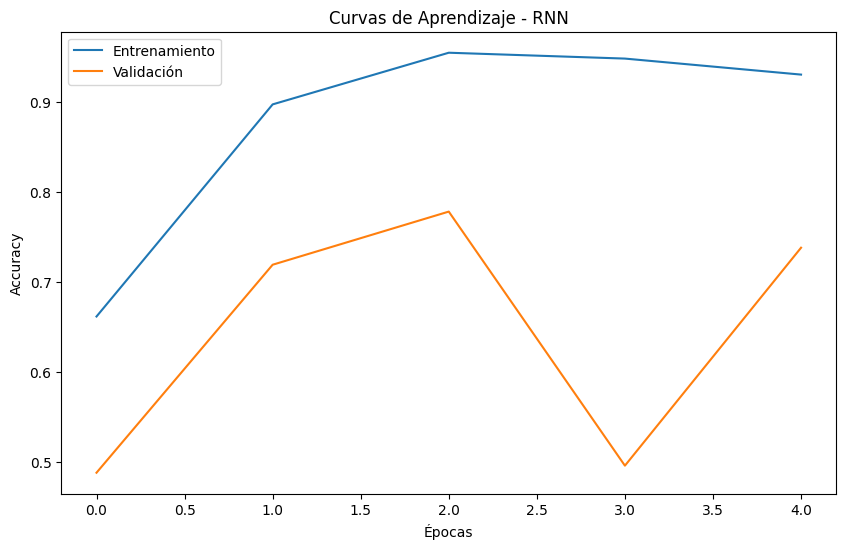

In [39]:
import matplotlib.pyplot as plt
# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

# Conclusiones del modelo

Un modelo de redes es muy bueno para el analisis de secuencias como lo son nuestro corpus de noticias, lo que podemos evidenciar en el nivel de aprendizaje del modelo, empezando en un 66% hasta llegar en pocas epocas a un 93%, esta curva se debe al efecto del desvanecimiento del gradiente, un efecto de este modelo que debido a su dependecia o memoria con nuevas entradas hace que a largo plazo o corpus con noticias muy robustas empiecen a ocurrir una perdida de memoria.
Aun sin embargo el modeo es bueno, pero un efecto mas notorio sucede en la etapa de evaluacion, en la 3ra epoca tuvo una gran caida y se repode su accuracy al 72% aproximadamente.

Esto no es un buen sintoma para este tipo modelo que por otro lado no esta llegando a nuestro valor objetivo del proyecto.

## 4. Modelo de Redes LSTM (Long Short Term) Division de los datos

In [41]:
import tensorflow as tf
dicc={'archivo':0, 'colombia':1, 'deportes':2, 'mundo':3}

y_prueba_2=[dicc[tema] for tema in data_filtrada['Etiqueta']]

y_prueba=tf.keras.utils.to_categorical(y_prueba_2, num_classes=4)

# División del conjunto de datos
X_entre2, X_eva, y_entre2, y_eva = train_test_split(X, y_prueba, test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
X_entre, y_entre = ros.fit_resample(X_entre2, y_entre2)
print(X_entre.shape, y_entre.shape)

(27896, 300) (27896, 4)


De igual manera que en el modelo anterior el modelo LSTM necesita que sean vectorizados las etiquetas que nos clasifican el corpus de noticias, en esta ocasion se usa una funcion del keras.
luego de esto se hace la division de los datos de entrenamiento y validacion y toma los primeros para igualar el numero de noticias en todas las categorias

## 5. Entrenamiento y grafico de los resultados de Entrenamiento y Validacion 

Epoch 1/7
872/872 [==============================] - 2924s 3s/step - loss: 0.9719 - accuracy: 0.6130 - val_loss: 1.0576 - val_accuracy: 0.5509
Epoch 2/7
872/872 [==============================] - 1922s 2s/step - loss: 0.5526 - accuracy: 0.7972 - val_loss: 0.8598 - val_accuracy: 0.7158
Epoch 3/7
872/872 [==============================] - 2046s 2s/step - loss: 0.4132 - accuracy: 0.8707 - val_loss: 0.6741 - val_accuracy: 0.7614
Epoch 4/7
872/872 [==============================] - 2998s 3s/step - loss: 0.2794 - accuracy: 0.9151 - val_loss: 0.5537 - val_accuracy: 0.7794
Epoch 5/7
872/872 [==============================] - 3435s 4s/step - loss: 0.1683 - accuracy: 0.9526 - val_loss: 0.4663 - val_accuracy: 0.8111
Epoch 6/7
872/872 [==============================] - 21081s 24s/step - loss: 0.2283 - accuracy: 0.9280 - val_loss: 0.4312 - val_accuracy: 0.8369
Epoch 7/7
872/872 [==============================] - 3986s 5s/step - loss: 0.1221 - accuracy: 0.9671 - val_loss: 0.3837 - val_accuracy: 0.86

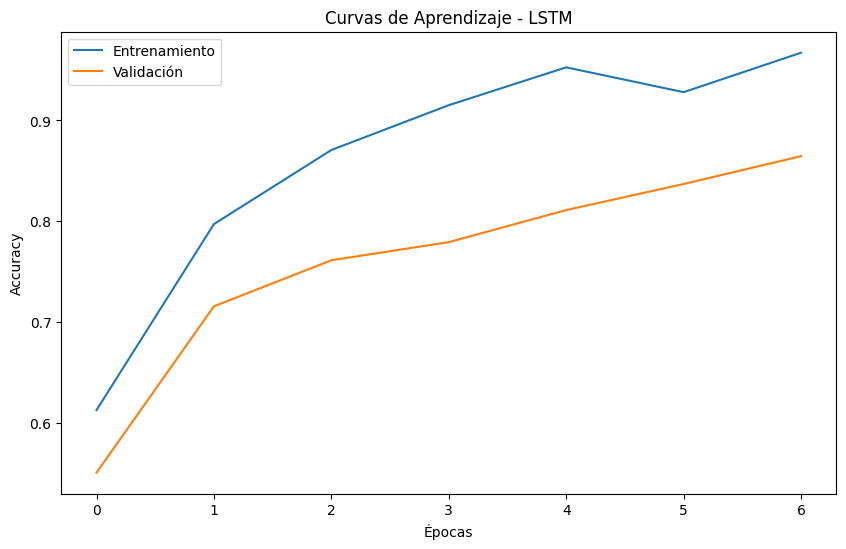

In [46]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.utils import to_categorical

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=528, input_length=MAX_SEQUENCE_LENGTH))
#model_lstm.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(units=32)))
model_lstm.add(Dense(units=len(etiquetas_mas_relevantes), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_entre, y_entre, validation_data=(X_eva, y_eva), epochs=7, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


El modelos LSTM tambien funciona para problemas recurrente como el corpus de noticias, con la variante de que cada palabra es analizada en relacion a las demas asi estas esten distantes de su ubicacion, por medio de una relacion semantica de las palabras, de igual manera este modelo se compone de algunas capas como sigue:

Este modelo consta con 3 capas importantes:
* Embeding: Permite analizar cada una de las palabras transformandolas en vectores densos de 528 (outputs) caracteres cada una, esta capa tiene la capacidad de crear relaciones semanticas entre palabras.
* Bidireccional: Esta es una capa muy eficiente que permite revisar la secuencia de las palabras hacia en ambas direcciones del texto y expresa un entendimiento con otras partes del texto antes y despues de esa palabra.
* Dense: Esta capa densa que tiene asignada una neura por cada una de las Etiquetas a predecir (Units) y la activacion del modelo de probabilidad de caer en alguna de estas clasificaciones llamado (SoftMax)

## Comparación de Resultados

**Objetivo:** Evaluar y comparar el rendimiento de los modelos RNN y LSTM.
**Acciones:**
* Calcular y comparar métricas de rendimiento como precisión, recall y F1-score para ambos modelos.
* Visualizar las curvas de aprendizaje y los resultados de validación para entender mejor cómo se desempeñan los modelos en las tareas de clasificación.
* Comparar los modelos permite entender las fortalezas y debilidades de cada enfoque, proporcionando información valiosa para elegir el modelo más adecuado para tareas específicas de clasificación de texto. Documentar estos resultados de forma asertiva en el cuaderno y en el informe.

# Metricas del modelo RNN

In [48]:
# Validacion del modelo RNN

loss, accuracy = model_rnn.evaluate(X_val, y_val, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

### Calculemos la matriz de confusión
y_pred = model_rnn.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred_classes))

## Veamos el reporte

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_classes))

Test Loss: 0.8357
Test Accuracy: 0.7379
68/68 [==============================] - 37s 539ms/step
[[1502  107   91   49]
 [  74   58   26   29]
 [  75   33   28   10]
 [  43   18   14   14]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1749
           1       0.27      0.31      0.29       187
           2       0.18      0.19      0.18       146
           3       0.14      0.16      0.15        89

    accuracy                           0.74      2171
   macro avg       0.37      0.38      0.37      2171
weighted avg       0.75      0.74      0.75      2171



El modelo RNN muestra un nivel de efectividad el 73% sobre todas las predicciones de las noticias, esto invitaria a pensar que un es un nivel aceptable de confiabilidad.
Por otro lado el indicador de pérdida se encuentra en el 0.83 el cual deberia ser cercano a 0 para ser considerado bueno, evidencia de que internamente las etiquetas tienen problemas de predicción.
La etiqueta 1 correspondiente a las noticias de cultura tiene una presicion de clasificacion del 31%, la segunda etiqueta el 19% y la tercera solamente el 16%, haciendo que este modelo aparentemente aceptable uno realmente ineficiente en el detalle de cada una de las categorias.

# Metricas del modelo LSTM

In [49]:
# Validacion del modelo LSTM

loss, accuracy = model_lstm.evaluate(X_eva, y_eva, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

### Calculemos la matriz de confusión
y_pred2 = model_lstm.predict(X_eva)
y_pred_lstm = np.argmax(y_pred2, axis=1)

from sklearn.metrics import confusion_matrix
y_eva2 = np.argmax(y_eva, axis=1)
print(confusion_matrix(y_eva2, y_pred_lstm))

## Veamos el reporte

from sklearn.metrics import classification_report

print(classification_report(y_eva2, y_pred_lstm))

Test Loss: 0.3837
Test Accuracy: 0.8646
68/68 [==============================] - 104s 1s/step
[[1593   63   77   37]
 [  54  124    1    9]
 [  19    0  102    3]
 [  24    6    1   58]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1770
           1       0.64      0.66      0.65       188
           2       0.56      0.82      0.67       124
           3       0.54      0.65      0.59        89

    accuracy                           0.86      2171
   macro avg       0.67      0.76      0.71      2171
weighted avg       0.88      0.86      0.87      2171



Para el caso del modelo LSTM vemos que en la eficiencia general del modelo están en un 86.46% obteniendo un modelo bastante bueno, por otro lado el test de pérdida se encuentra en el 0.3837 lo cual es un valor bastante bajo indicando que posiblemente en las categorías se han logrado buenas asignaciones o predicciones.

Vemos en la matriz de confusión que la categoría 0 con un 90% de precisión y la 2 con un 82%, alcanzarón un muy buen indicador de aceptividad, por otro lado las categorías 1 y 3 con una acertividas cercana al 65% evidencian un modelo aceptable para cada una de las categorías.

La precisión observada en las característica 2 y 3 se encuentran alrededor del 55%, evidenciando que la mayor cantidad de errores de predicción de noticias se encuentran en estas 2 categorías. 

En general vemos que el modelo LSTM de larga memoria logra hacer una buena segregación y entendimiento de las diferentes etiquetas aunque estas no se encuentren balanceadas, es decir, que las proporciones de noticias no se presenta de manera igualitaria pues en el tipo de noticias 0, existe alrededor de 1770 noticias que corresponden casi al 90% de las muestras y aun así la segunda categoría con 124 noticias, logra un efectividad el 82%, demostrando que este modelo es muy efectivo en este tipo de situaciones.

# Conclusiones y Recomendaciones

## **Conclusiones**
1. **Desempeño del Modelo RNN:**
   - El modelo RNN mostró limitaciones significativas en tareas de clasificación compleja, evidenciadas por valores bajos en las métricas de precisión (0.37), recall (0.38) y F1-score (0.37).
   - La arquitectura de RNN, aunque simple y rápida, no es adecuada para manejar relaciones a largo plazo en los datos, debido a problemas de desvanecimiento y explosión del gradiente.

2. **Desempeño del Modelo LSTM:**
   - El modelo LSTM demostró ser altamente efectivo para la clasificación de noticias, obteniendo métricas sobresalientes: precisión (0.67), recall (0.76) y F1-score (0.71).
   - Gracias a su arquitectura basada en celdas de memoria, el LSTM es capaz de capturar dependencias a largo plazo y realizar un análisis contextual del texto, lo que resulta esencial para esta tarea.

## **Recomendaciones**

1. **Optimización del Modelo LSTM:**
   - Implementar técnicas de regularización como Dropout para prevenir el sobreajuste, especialmente en conjuntos de datos más pequeños.
   - Ajustar los hiperparámetros (tamaño de la memoria, tasa de aprendizaje, número de capas) mediante un enfoque sistemático como búsqueda en cuadrícula o optimización bayesiana para maximizar el rendimiento.
   - Considerar el uso de embeddings preentrenados como Word2Vec, GloVe o BERT para mejorar la representación semántica del texto, incrementando la precisión y eficiencia del modelo.

2. **Alternativas para Explorar:**
   - Evaluar modelos avanzados como Transformers (e.g., BERT, GPT) que han demostrado un rendimiento superior en tareas de clasificación de texto.
   - Implementar redes bidireccionales LSTM (BiLSTM) para capturar relaciones contextuales en ambas direcciones del texto, lo que podría mejorar aún más la precisión.
   - Probar enfoques híbridos, combinando LSTM con arquitecturas de atención para priorizar las palabras más relevantes en el análisis.

3. **Mejoras en el Modelo RNN:**
   - Aunque limitado, el RNN podría mejorarse parcialmente mediante la incorporación de técnicas de atención simples para mitigar los problemas de gradiente y capturar dependencias clave en los datos.
   - Utilizar variantes como GRU (Gated Recurrent Unit) que ofrecen un balance entre simplicidad y capacidad de manejo de dependencias a largo plazo.